In [7]:
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from sympy import Symbol
from sympy import plot

In [20]:
#ABRINDO E LENDO ARQUIVOS NECESSARIOS.
arq1 = open('Meses_Contagem.txt')
x1 = arq1.readlines()
arq2 = open('Meses_Ciclos.txt')
x2 = arq2.readlines()
arq3 = open('Meses_Mudancas.txt')
x3 = arq3.readlines()
arq1.close()
arq2.close()
arq3.close()

In [9]:
#NOMEANDO ALGUMAS VAREAVEIS UTEIS.
t1 = len(x1)
t2 = len(x2)
t3 = len(x3)

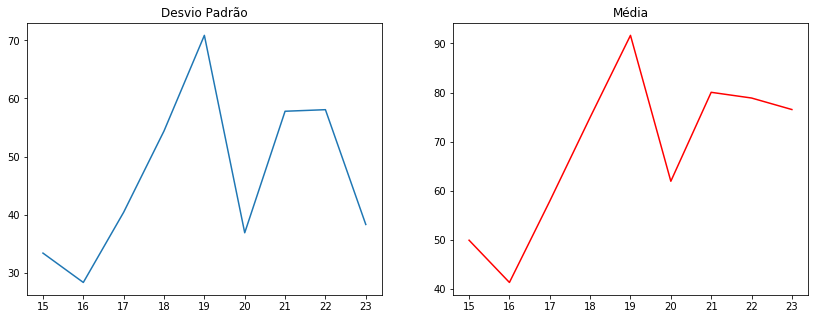

In [28]:
#SEPARANDO OS CICLOS E CALCULANDO A MEDIA E O DESVIO PADRAO.
max = 0 
min = 0
varre = 0
c = 0
inicio = 0
media = 0
mediasqr = 0
ciclo = 14
sigma = 0
var = list(range(9))
dvp = list(range(9))
mda = list(range(9))
clo = list(range(9))
for i in range(0,t2):
    for j in range(0,t3):
        if x2[i] == x3[j]:
            ciclo += 1
            final = inicio + len(x2[inicio:i])
            sc= x1[inicio:final] 
            for n in range(0,len(sc)-1):
                if sc[n+1]>sc[n]:
                    max = sc[n+1]
                    min = sc[n]
            for n in sc:
                #print(f'\n{n:4}',end = '')
                media += float(n)
                mediasqr += float(n)**2
            soma = media
            media = media/len(sc)
            mediasqr = mediasqr/len(sc)
            for n in sc:
                sigma += (float(n) - media)**2
            sigma = (sigma/len(sc))**(0.5)
            #sigma = sigma/media
            var[c] = (mediasqr)**(0.5)/sigma
            dvp[c] = sigma
            mda[c] = media
            clo[c] = ciclo
            inicio = final
            max = 0
            min = 0
            c += 1
            #print(f'A média do ciclo {ciclo} é {media}',end='')
            #print(f'\n O desvio padrão do ciclo {ciclo} é {sigma}',end='')
            #print()
            #print(f'\n Achei um novo ciclo no mês {x2[i]}',end='')
#print(dvp)
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(clo,dvp)
plt.title('Desvio Padrão')
plt.subplot(1,2,2)
plt.plot(clo,mda,'r')
plt.title('Média')
plt.savefig('Gráficos dente de serra.jpeg')

In [15]:
#CRIANDO OS POLINOMIOS DE LAGRANGE.
x = Symbol('x')
y = -0.000436*x**8 + 0.06594*x**7 - 4.351*x**6 + 163.5*x**5 - 3830*x**4 + 5.724e+04*x**3 - 5.331e+05*x**2 + 2.828e+06*x - 6.544e+06
lag_pol = lagrange(clo,var)
derivada = y.diff(x)
#plot(x,-0.003488*x**7 + 0.46158*x**6 - 26.106*x**5 + 817.5*x**4 - 15320*x**3 + 171720.0*x**2 - 1066200.0*x + 2828000.0,(x,0,20))

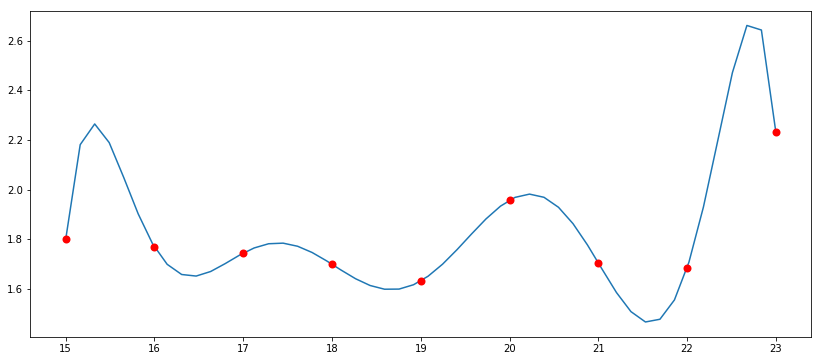

In [18]:
x = np.linspace(clo[0], clo[-1])
plt.figure(figsize=(14,6))
plt.plot(x, lag_pol(x))
plt.plot(clo, var,'ro', mew=2)
plt.show()